In [1]:
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [6]:
df_american = df_american.set_index(['date'])

In [7]:
df_american.head()

,pax_count,revenue,seat_miles,load_factor,flights
date,,,,,
2003-01-01,7013818,9405547,14038698,67.00,78214
2003-02-01,6363926,8355084,12142241,68.81,67463
2003-03-01,7628481,9981627,13929984,71.66,77125
2003-04-01,7103085,9325622,13210596,70.59,73182
2003-05-01,7447462,9838460,13345197,73.72,73381


# ARIMA

## Data split

In [9]:
X = df_american['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]

## Stationarity

In [10]:
stationarity = adfuller(X)
print('ADF Statistics: %f' % stationarity[0])
print('p-value: %f' % stationarity[1])
for key, value in stationarity[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -0.433367
p-value: 0.904377
	1%: -3.465
	5%: -2.877
	10%: -2.575


## Differencing

In [11]:
df_american['pax_first_diff'] = X.diff()

In [12]:
Y = df_american['pax_first_diff'] 

In [13]:
Y = Y.dropna()

In [14]:
stationarity = adfuller(Y)
print('ADF Statistics: %f' % stationarity[0])
print('p-value: %f' % stationarity[1])
for key, value in stationarity[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -3.546320
p-value: 0.006874
	1%: -3.465
	5%: -2.877
	10%: -2.575


<AxesSubplot:xlabel='date'>

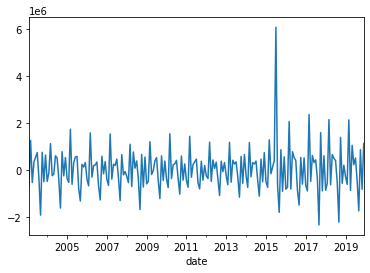

In [15]:
Y.plot()

## Augmented Dickey Fuller Test (AIC)

In [16]:
stepwise_fit = auto_arima(X, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6144.495, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6151.257, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6135.029, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6133.166, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6149.502, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6135.098, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6135.087, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6138.162, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6131.964, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6133.906, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6133.943, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6133.616, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6139.262, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.937 seconds


## ACF & PACF

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [18]:
import statsmodels.api as sm

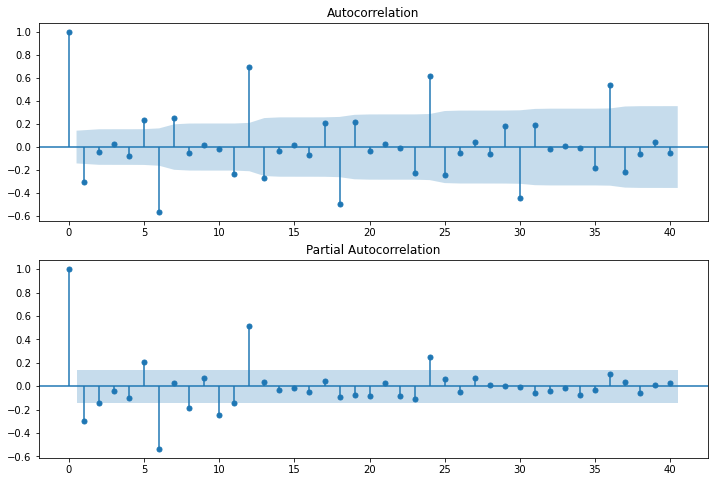

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y.iloc[13:],lags=40,ax=ax2)

ACF & PACF- Analyze bestätigt das Ergebnis vom AIC-Test **nicht** => ARIMA (0,1,1) & ARIMA(1,1,1) testen

## Model

In [20]:
model_arima_011 = ARIMA(X, order=(0,1,1))
model_arima_fit_011 = model_arima_011.fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [21]:
model_arima_111 = ARIMA(X, order=(1,1,1))
model_arima_fit_111 = model_arima_111.fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
model_arima_fit_011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              pax_count   No. Observations:                  204
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3063.982
Date:                Fri, 25 Nov 2022   AIC                           6131.964
Time:                        22:54:07   BIC                           6138.591
Sample:                    01-01-2003   HQIC                          6134.645
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2907      0.053     -5.443      0.000      -0.395      -0.186
sigma2      7.453e+11   2.05e-14   3.63e+25      0.000    7.45e+11    7.45e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              1239.16
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.62e+40. Standard errors may be unstable.
"""

In [23]:
model_arima_fit_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              pax_count   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3063.953
Date:                Fri, 25 Nov 2022   AIC                           6133.906
Time:                        22:54:07   BIC                           6143.845
Sample:                    01-01-2003   HQIC                          6137.927
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0696      0.188      0.370      0.711      -0.299       0.438
ma.L1         -0.3588      0.167     -2.148      0.032      -0.686      -0.031
sigma2      7.442e+11   1.06e-13   7.01e+24      0.000    7.44e+11    7.44e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):              1241.25
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+40. Standard errors may be unstable.
"""

## Residuals

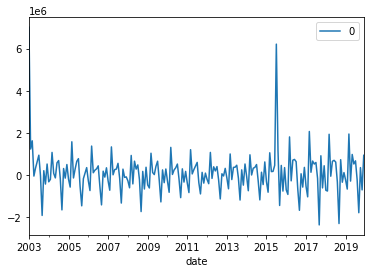

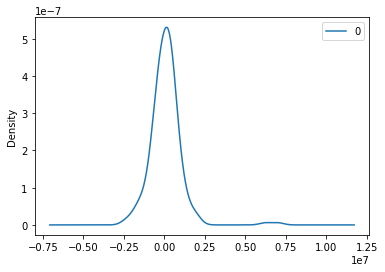

                  0
count  2.040000e+02
mean   8.962870e+04
std    9.942825e+05
min   -2.374415e+06
25%   -3.667403e+05
50%    9.441237e+04
75%    4.930953e+05
max    7.013818e+06


In [24]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_arima_fit_011.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

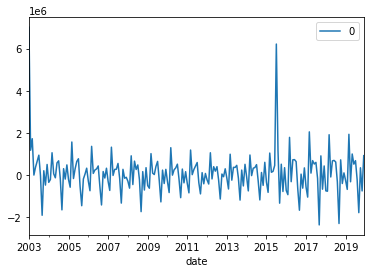

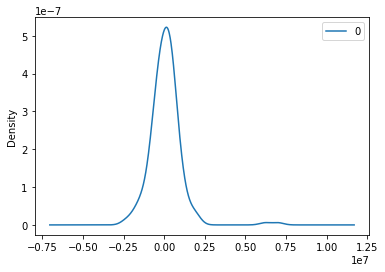

                  0
count  2.040000e+02
mean   9.185616e+04
std    9.939709e+05
min   -2.356573e+06
25%   -3.899507e+05
50%    8.367784e+04
75%    5.026937e+05
max    7.013818e+06


In [25]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_arima_fit_111.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Forecast

In [26]:
predictions_arima_011 = df_american['forecast_arima'] = model_arima_fit_011.predict(start = 163, dynamic = False)

In [27]:
predictions_arima_111 = df_american['forecast_arima'] = model_arima_fit_111.predict(start = 163, dynamic = False)

In [28]:
predictions_arima_011.tail()

2019-08-01    1.416618e+07
2019-09-01    1.400155e+07
2019-10-01    1.272826e+07
2019-11-01    1.297482e+07
2019-12-01    1.247080e+07
Freq: MS, Name: predicted_mean, dtype: float64

## Visualization

<AxesSubplot:xlabel='date'>

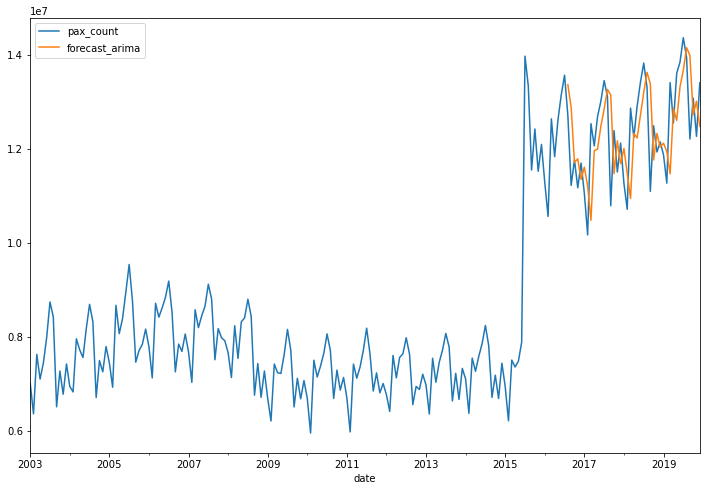

In [29]:
df_american[['pax_count', 'forecast_arima']].plot(figsize = (12,8))

## Model assessment

### MAE and RMSE

In [30]:
print(round(mean_absolute_error(test_set, predictions_arima_011),2))

779987.04


In [31]:
print(round(mean_absolute_error(test_set, predictions_arima_111),2))

785012.04


In [32]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_arima_011)), 2))

994283.67


In [33]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_arima_111)), 2))

994492.45


### MAPE function

In [34]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [35]:
round(MAPE(test_set, predictions_arima_011),2)

6.43

In [36]:
round(MAPE(test_set, predictions_arima_111),2)

6.47

## Export Forecast

In [86]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines


In [87]:
predictions_arima_011.to_csv('predictions_arima.csv', index = True)

# SARIMA

In [37]:
import statsmodels.api as sm

## Model

In [38]:
stepwise_sarima = auto_arima(X, 
                          start_p=0, d=1, start_q=0, 
                          max_p=5, max_d =5, max_q=5,
                          start_P=0, D=1, start_Q=0, 
                          max_P =5, max_D=5, max_Q=5, 
                          m=12,seasonal=True, 
                          error_action='warn', trace = True,
                         supress_warnings=True, stepwise=True,
                         n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5657.597, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5632.164, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5616.215, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5656.507, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5612.421, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5632.161, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5614.304, Time=0.61 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5614.335, Time=1.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5612.618, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5624.155, Time=0.32 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=5614.958, Time=3.31 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=5603.500, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5609.232, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5630.103, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1

In [39]:
model_sarima = sm.tsa.statespace.SARIMAX(X,order=(0, 1, 0),seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37491D+01    |proj g|=  2.38333D-01

At iterate    5    f=  1.37194D+01    |proj g|=  1.24210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   6.666D-06   1.372D+01
  F =   13.719362573684654     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


In [40]:
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            pax_count   No. Observations:                  204
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2798.750
Date:                              Fri, 25 Nov 2022   AIC                           5603.500
Time:                                      23:00:45   BIC                           5613.257
Sample:                                  01-01-2003   HQIC                          5607.452
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2690      0.069      3.895      0.000       0.134       0.404
ma.S.L12      -0.8043      0.074    -10.924      0.000      -0.949      -0.660
sigma2      3.405e+11   2.81e-13   1.21e+24      0.000    3.41e+11    3.41e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):             29330.58
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               5.41   Skew:                             5.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+39. Standard errors may be unstable.
"""

## Residuals

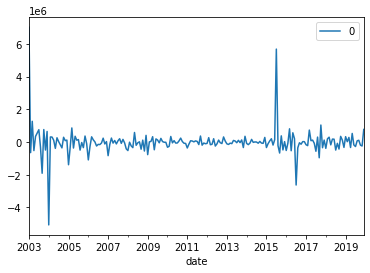

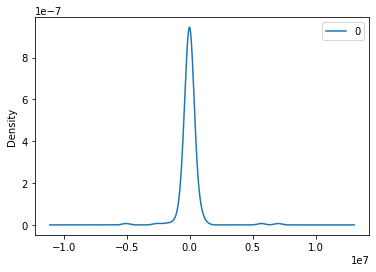

                  0
count  2.040000e+02
mean  -4.770488e+03
std    8.357095e+05
min   -5.068337e+06
25%   -1.936903e+05
50%   -3.473768e+04
75%    1.516782e+05
max    7.013818e+06


In [41]:
from matplotlib import pyplot
residuals = pd.DataFrame(results_sarima.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Forecast

In [42]:
predictions_sarima = df_american['forecast_sarima'] = results_sarima.predict(start = 163)

In [43]:
df_american['forecast_sarima'].tail()

date
2019-08-01    1.386074e+07
2019-09-01    1.210194e+07
2019-10-01    1.326945e+07
2019-11-01    1.250905e+07
2019-12-01    1.263538e+07
Name: forecast_sarima, dtype: float64

## Visualization

<AxesSubplot:xlabel='date'>

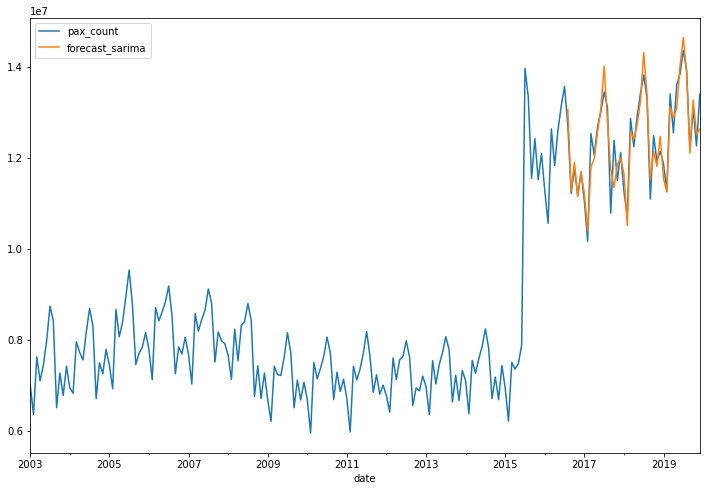

In [44]:
df_american[['pax_count', 'forecast_sarima']].plot(figsize = (12,8))

<AxesSubplot:xlabel='date'>

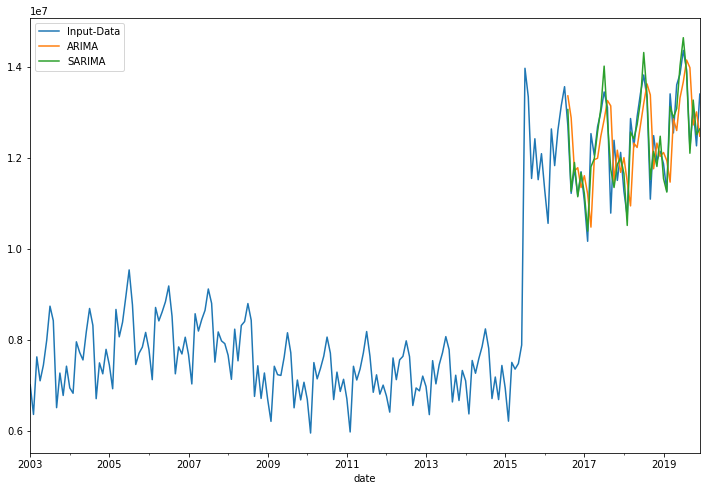

In [45]:
df_american['pax_count'].plot(legend = True, label = 'Input-Data',figsize = (12,8))
df_american['forecast_arima'].plot(legend = True, label = 'ARIMA')
df_american['forecast_sarima'].plot(legend = True, label = 'SARIMA')

## Model assessment

### MAE and RMSE

In [46]:
print(round(mean_absolute_error(test_set, predictions_sarima),2))

288637.86


In [47]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_sarima)), 2))

374839.35


### MAPE function

In [48]:
round(MAPE(test_set, predictions_sarima),2)

2.34

### MAPE function

## Export Forecast

In [100]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines


In [101]:
predictions_sarima.to_csv('predictions_sarima.csv', index = True)